In [1]:
# !pip install neuron
# !pip install netpyne
import matplotlib

In [2]:
# Th Cells: 3709

# VPL_sTC 656
# VPM_sTC 839
# POm_sTC_s1 685
# ss_RTN_o 382
# ss_RTN_m 382
# ss_RTN_i 765

# S1 Cells
# L5_TTPC2 553 (PT5B)
# L6_TPC_L4 312 (CT5A, CT5B, and CT6)
# L5_LBC 58
# L6_LBC 100

In [3]:
# #convergence Th->S1
# mtype VPM_sTC POm_sTC_s1 nameref
# L5_TTPC2 299 277 L5_TT
# L6_TPC_L4 131 66 L6_PY
# L5_LBC 166 164 L5_IN
# L6_LBC 77 39 L6_IN

In [4]:
from netpyne import specs, sim
import numpy as np

%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 300.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 300.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries
#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

## Cell params
secs = {}   # sections dict
secs['soma'] = {'geom': {}, 'mechs': {}}                                                    # soma params dict
secs['soma']['geom'] = {'diam': 18.8, 'L': 18.8}                                            # soma geometry
secs['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['PYR'] = {'secs': secs}                                                # add dict to list of cell params

In [5]:
popNumber = {}

popNumber['L5_TTPC2'] = 553 #(PT5B)
popNumber['L5_LBC'] = 58
popNumber['L6_TPC_L4'] = 312 #(CT5A, CT5B, and CT6)
popNumber['L6_LBC'] = 100
popNumber['ss_RTN_o'] = 382
popNumber['ss_RTN_m'] = 382
popNumber['ss_RTN_i'] = 765
popNumber['VPL_sTC'] = 656
popNumber['VPM_sTC'] = 839
popNumber['POm_sTC_s1'] = 685

for pop in ['L5_TTPC2', 'L5_LBC', 'L6_TPC_L4', 'L6_LBC']:
    netParams.popParams[pop] = {'cellType': 'PYR', 'numCells': popNumber[pop], 
                                   'cellModel': 'HH', 'ynormRange': layer[pop[1]]} 
    
for pop in ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']:
    netParams.popParams[pop] = {'cellType': 'PYR', 'numCells': popNumber[pop], 
                                  'cellModel': 'HH', 'yRange': [ymin[pop], ymax[pop]]}

In [6]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 8.0, 'e': -80}  # inhibitory synaptic mechanism

netParams.popParams.keys()

odict_keys(['L5_TTPC2', 'L5_LBC', 'L6_TPC_L4', 'L6_LBC', 'ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1'])

In [7]:
convergence_Th_S1 = {}
convergence_Th_S1['VPM_sTC'] = {}
convergence_Th_S1['VPM_sTC']['L5_TTPC2'] = 299
convergence_Th_S1['VPM_sTC']['L6_TPC_L4'] = 131
convergence_Th_S1['VPM_sTC']['L5_LBC'] = 166
convergence_Th_S1['VPM_sTC']['L6_LBC'] = 77

convergence_Th_S1['VPL_sTC'] = {}
convergence_Th_S1['VPL_sTC']['L5_TTPC2'] = 299 
convergence_Th_S1['VPL_sTC']['L6_TPC_L4'] = 131
convergence_Th_S1['VPL_sTC']['L5_LBC'] = 166
convergence_Th_S1['VPL_sTC']['L6_LBC'] = 77

convergence_Th_S1['POm_sTC_s1'] = {}
convergence_Th_S1['POm_sTC_s1']['L5_TTPC2'] = 277
convergence_Th_S1['POm_sTC_s1']['L6_TPC_L4'] = 66
convergence_Th_S1['POm_sTC_s1']['L5_LBC'] = 164
convergence_Th_S1['POm_sTC_s1']['L6_LBC'] = 39

# mtype VPM_sTC POm_sTC_s1 nameref
# L5_TTPC2 299 277 L5_TT
# L6_TPC_L4 131 66 L6_PY
# L5_LBC 166 164 L5_IN
# L6_LBC 77 39 L6_IN

In [8]:
## Cell connectivity rules
radius_cilinder = netParams.sizeX/2.0
synapsesperconnection_Th_S1 = 9.0
radius2D_Th_S1 = 50.0
radius2D_S1_TC = 100.0
radius2D_S1_RTN = 75.0

for pre in ['VPM_sTC']: # , 'POm_sTC_s1', 'VPL_sTC', 
    for post in ['L6_LBC']: #'L5_TTPC2', 'L5_LBC', 'L6_TPC_L4', 
        
        conn_convergence = np.ceil(convergence_Th_S1[pre][post]/synapsesperconnection_Th_S1)
        prob_conv = 1.0*(conn_convergence/popNumber[pre])*((radius_cilinder**2)/(radius2D_Th_S1**2)) # prob*(AreaS1/Area_Th_syn)  
        probability_rule = '%f if dist_2D < %f else 0.0' % (prob_conv,radius2D_Th_S1)

        netParams.connParams['thal_'+pre+'_'+post] = { 
            'preConds': {'pop': pre}, 
            'postConds': {'pop': post},
            'weight': 0.720,  
            'delay': 'defaultDelay+dist_3D/propVelocity',
            'synsPerConn': int(synapsesperconnection_Th_S1), 
            'synMech': 'exc'}  

        if pre=='POm_sTC_s1':
            netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence # non-topographycal connectivity
        else:
            netParams.connParams['thal_'+pre+'_'+post]['probability'] = probability_rule # FO (First Order)

for pre in ['L5_TTPC2']: #, 'L6_TPC_L4'
    for post in ['POm_sTC_s1']:  #'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'ss_RTN_o', 
        
        conn_convergence = np.ceil(99.0/9.0)
        prob_conv = 1.0*(conn_convergence/popNumber[pre])*((radius_cilinder**2)/(radius2D_Th_S1**2)) # prob*(AreaS1/Area_Th_syn)  
        probability_rule = '%f if dist_2D < %f else 0.0' % (prob_conv,radius2D_Th_S1)

        netParams.connParams['thal_'+pre+'_'+post] = { 
            'preConds': {'pop': pre}, 
            'postConds': {'pop': post},
            'weight': 0.720,  
            'delay': 'defaultDelay+dist_3D/propVelocity',
            'synsPerConn': int(9.0), 
            'synMech': 'exc'}    

        if post=='POm_sTC_s1':
            netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence # non-topographycal connectivity
        else:
            netParams.connParams['thal_'+pre+'_'+post]['probability'] = probability_rule # FO (First Order)
        
# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut6'         # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file

# simConfig.analysis['plotRaster'] = {'saveFig': True, 'markerSize': 50, 'orderBy':'y'}                                # Plot a raster
# simConfig.analysis['plotTraces'] = {'include': [('S',0), ('M',0)], 'saveFig': True}  # Plot recorded traces for this list of cells


# Create network and run simulation
# sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

In [9]:
netParams.connParams

{thal_VPM_sTC_L6_LBC: {'preConds': {'pop': 'VPM_sTC'}, 'postConds': {'pop': 'L6_LBC'}, 'weight': 0.72, 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 9, 'synMech': 'exc', 'probability': '0.096544 if dist_2D < 50.000000 else 0.0'}, thal_L5_TTPC2_POm_sTC_s1: {'preConds': {'pop': 'L5_TTPC2'}, 'postConds': {'pop': 'POm_sTC_s1'}, 'weight': 0.72, 'delay': 'defaultDelay+dist_3D/propVelocity', 'synsPerConn': 9, 'synMech': 'exc', 'convergence': 11.0}}

## Th -> S1

In [10]:
sim.initialize(netParams = netParams, simConfig = simConfig);  				# create network object and set cfg and net params
sim.net.createPops();
sim.net.createCells();
sim.net.connectCells();
sim.gatherData(); 


Start time:  2021-06-17 11:20:55.792563

Creating network of 10 cell populations on 1 hosts...
  Number of cells on node 0: 4732 
  Done; cell creation time = 0.38 s.
Making connections...
  Number of connections on node 0: 8339 
  Number of synaptic contacts on node 0: 75051 
  Done; cell connection time = 2.95 s.

Gathering data...
  Done; gather time = 1.86 s.

Analyzing...
  Cells: 4732
  Connections: 8339 (1.76 per cell)
  Synaptic contacts: 75051 (15.86 per cell)


Plotting 2D representation of network cell locations and connections...


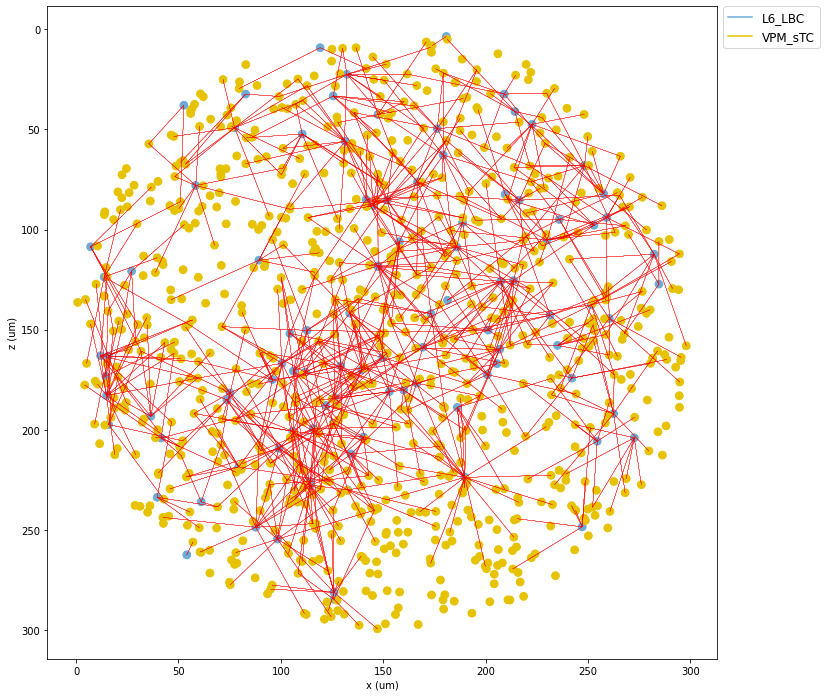

In [13]:
sim.analysis.plot2Dnet(include=['VPM_sTC','L6_LBC'],view='xz', showConns=True, 
                               popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);

In [ ]:
sim.analysis.plot2Dnet(view='xy', showConns=False, 
        popColors=None, tagsFile=None, figSize=(24, 24), fontSize=16, 
        saveData='../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel + '_full_NOnet.json', 
        saveFig='../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel + '_full_NOnet.png', showFig=True, lineWidth=0.1);


In [ ]:
for pre in ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']: 
    for post in ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']: 
        sim.analysis.plot2Dnet(include=[pre, post], view='xy', showConns=True, 
        popColors=None, tagsFile=None, figSize=(24, 24), fontSize=16, 
        saveData='../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel + '_' + pre + '->' + post + '_net.json', 
        saveFig='../data/'+cfg.simLabel[0:9]+'/'+cfg.simLabel + '_' + pre + '->' + post + '_net.png', showFig=True, lineWidth=0.1);


Plotting 2D representation of network cell locations and connections...


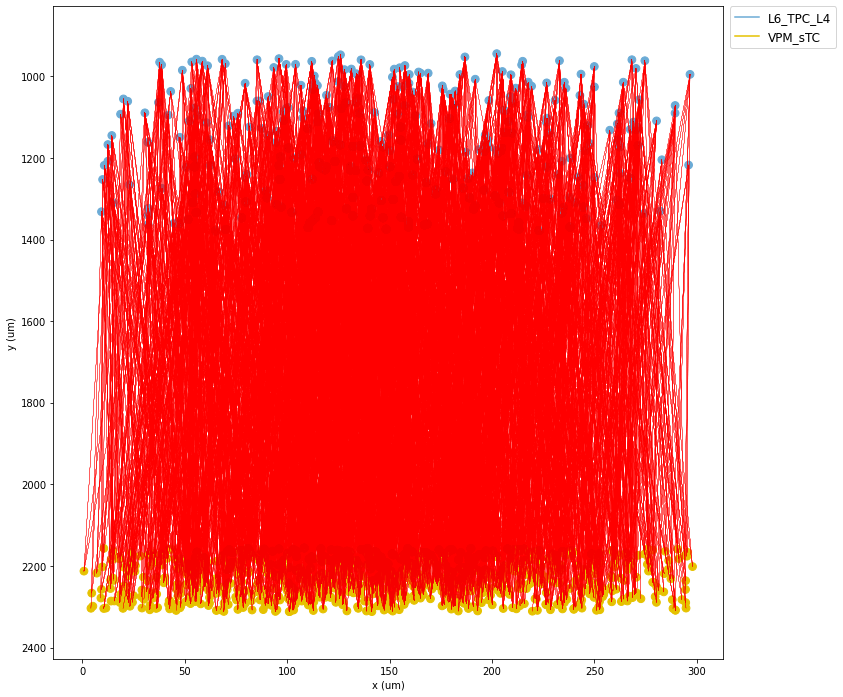

Plotting 2D representation of network cell locations and connections...


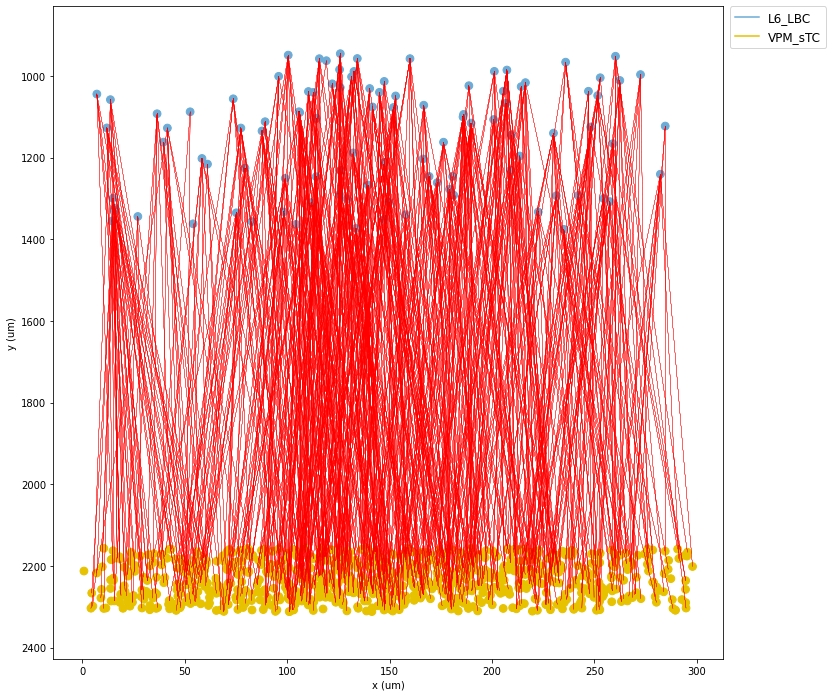

Plotting 2D representation of network cell locations and connections...


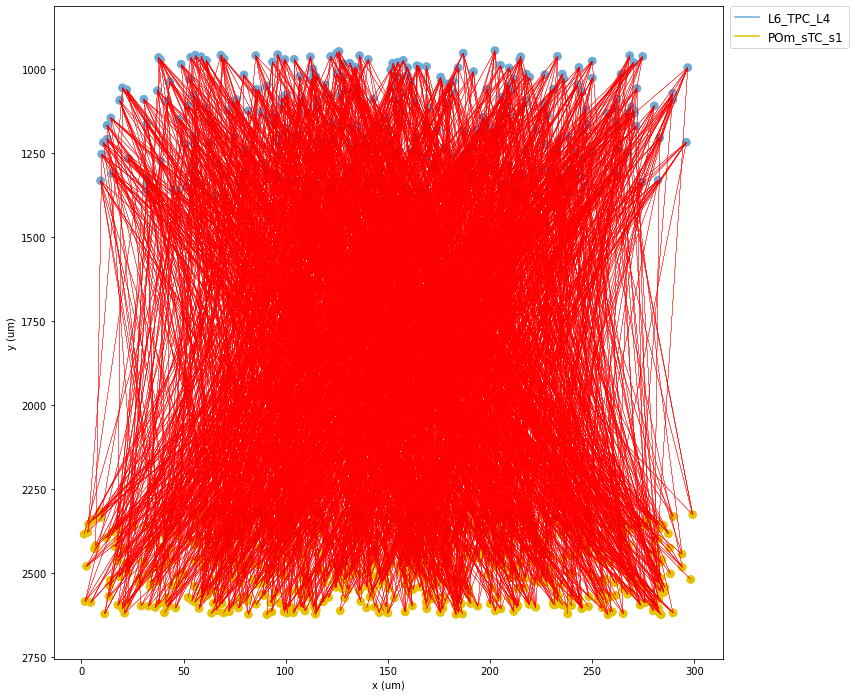

Plotting 2D representation of network cell locations and connections...


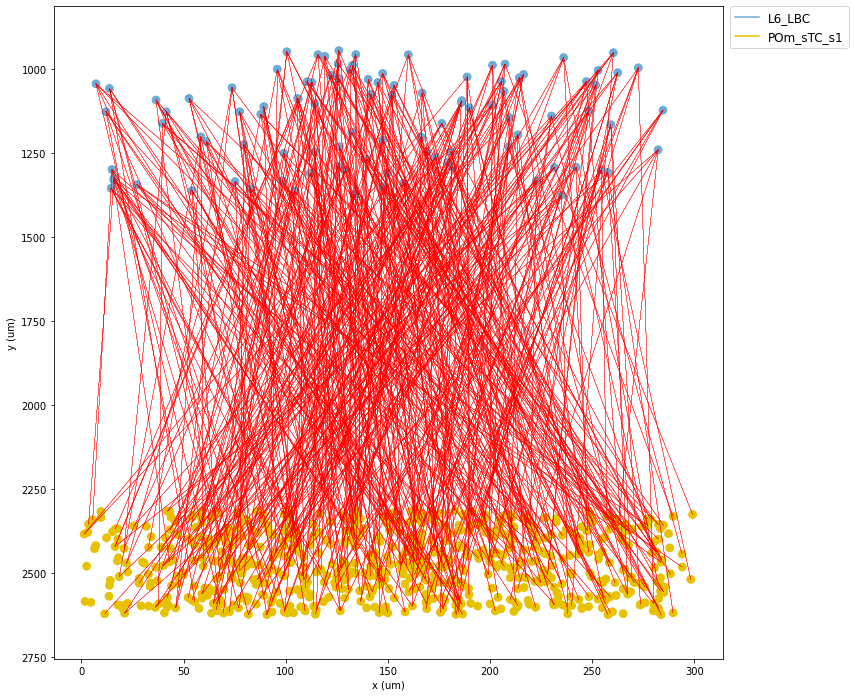

Plotting 2D representation of network cell locations and connections...


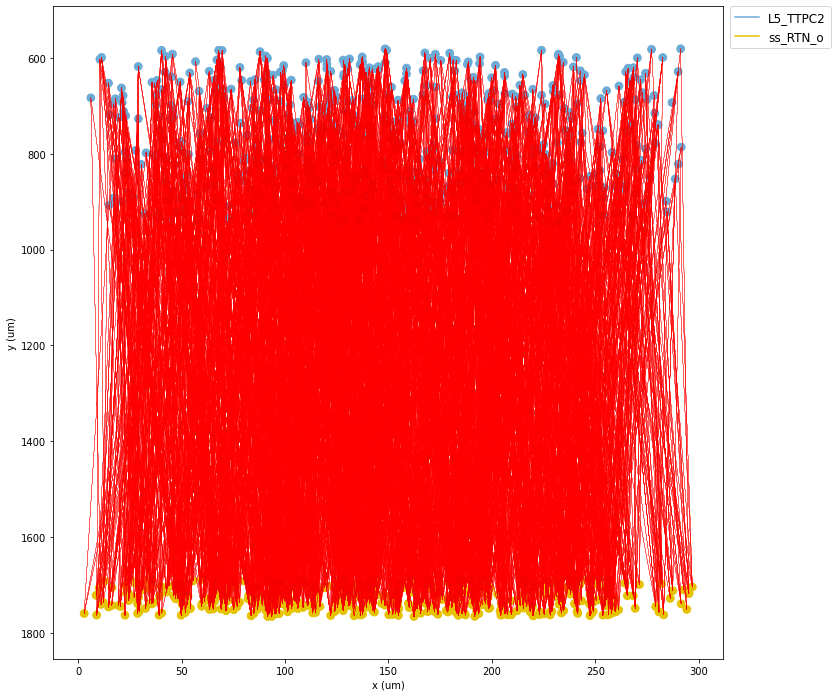

Plotting 2D representation of network cell locations and connections...


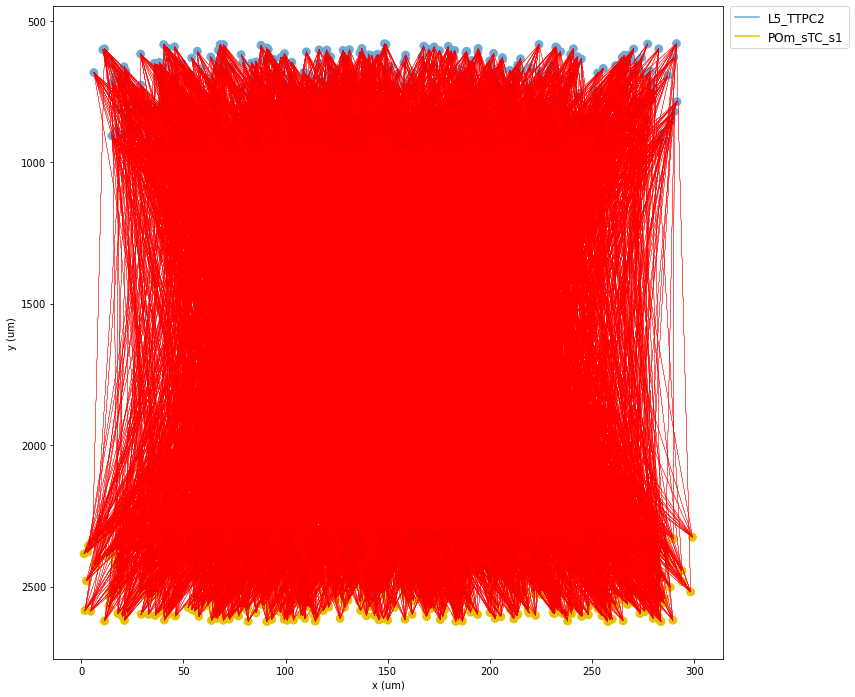

In [11]:
for pre in ['VPL_sTC','VPM_sTC', 'POm_sTC_s1']: #'VPL_sTC', 
    for post in ['L6_TPC_L4', 'L6_LBC']: #'L5_TTPC2', 'L5_LBC', 
        sim.analysis.plot2Dnet(include=[pre, post], view='xy', showConns=True, 
                               popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);

for pre in ['L5_TTPC2']: #, 'L6_TPC_L4'
    for post in ['ss_RTN_o', 'POm_sTC_s1']:  #'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 
        sim.analysis.plot2Dnet(include=[pre, post], view='xy', showConns=True, 
                               popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);        

Plotting connectivity matrix...


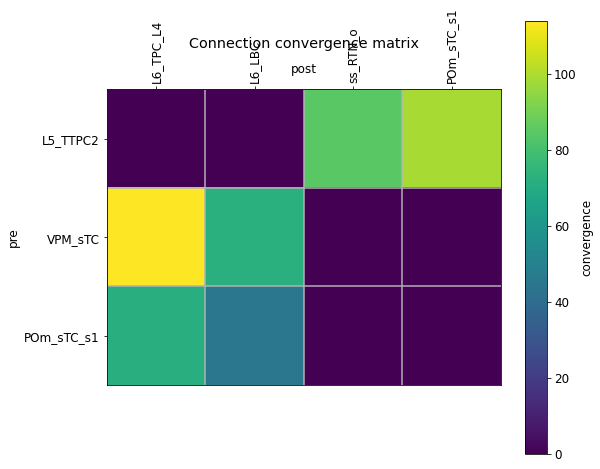

In [12]:
test = sim.analysis.plotConn(includePre=['L5_TTPC2', 'VPM_sTC', 'POm_sTC_s1'], includePost = ['ss_RTN_o', 'POm_sTC_s1', 'L6_TPC_L4', 'L6_LBC'], feature='convergence', showFig=False);

# mtype           VPL_sTC     VPM_sTC    POm_sTC_s1        nameref
# L5_TTPC2          299         299         277             L5_TT
# L5_LBC            166         166         164             L5_IN
# L6_TPC_L4         131         131         66              L6_PY
# L6_LBC             77          77         39              L6_IN

# for i in range(4):
#     print('%.1f %.1f %.1f' % (test[1]['connMatrix'][0][i],test[1]['connMatrix'][1][i],test[1]['connMatrix'][2][i]))

Plotting 2D representation of network cell locations and connections...


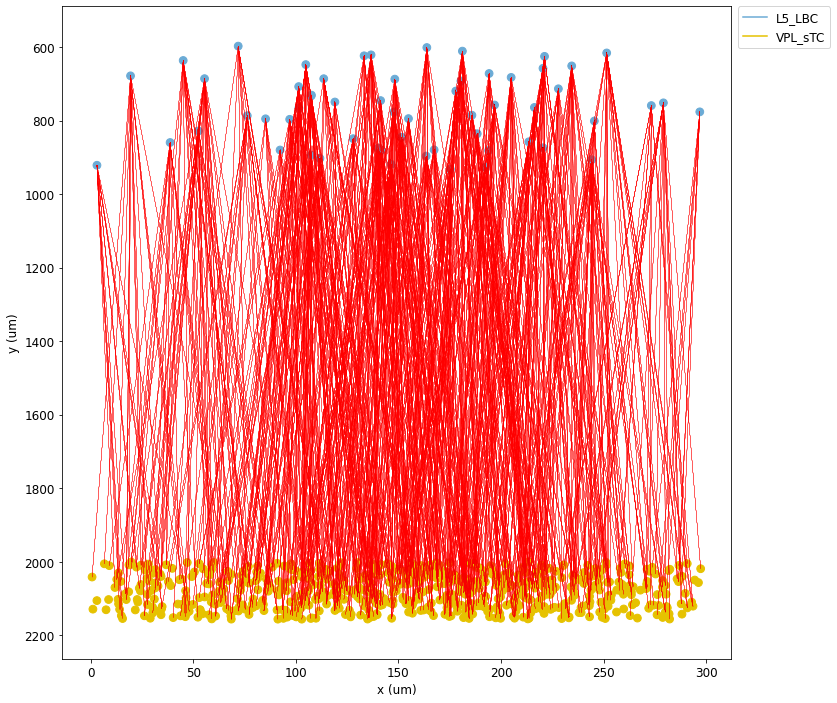

Plotting 2D representation of network cell locations and connections...


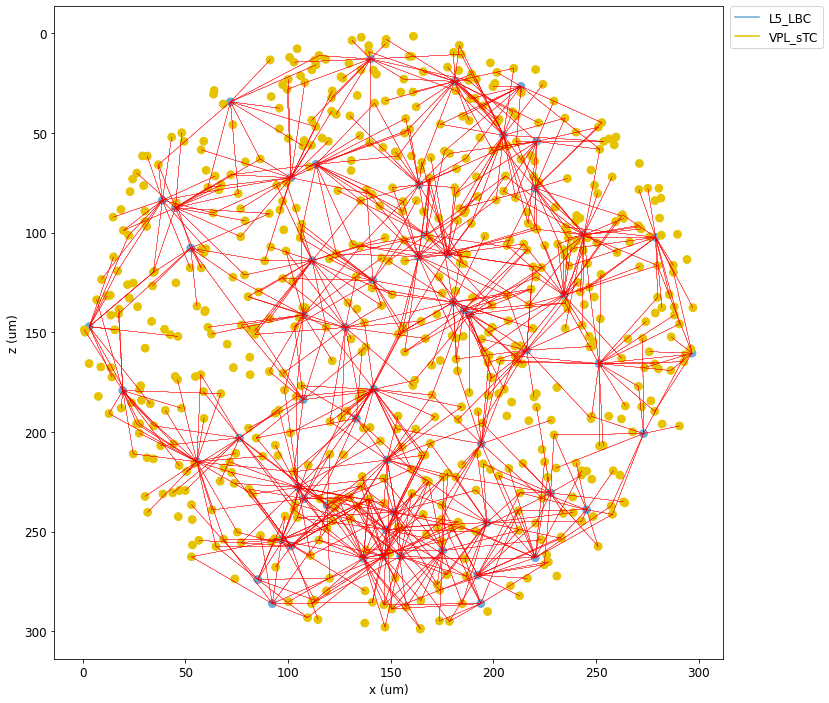

In [45]:
sim.analysis.plot2Dnet(include=['VPL_sTC','L5_LBC'], view='xy', showConns=True, popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, saveFig=None, showFig=True, lineWidth=0.1);
sim.analysis.plot2Dnet(include=['VPL_sTC','L5_LBC'], view='xz', showConns=True, popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, saveFig=None, showFig=True, lineWidth=0.1);

Plotting 2D representation of network cell locations and connections...


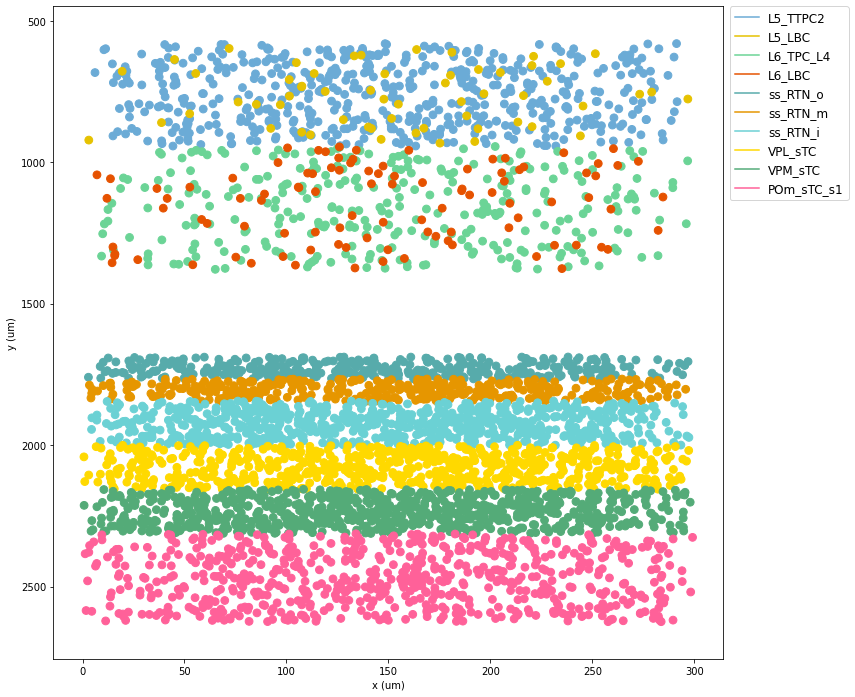

Plotting 2D representation of network cell locations and connections...


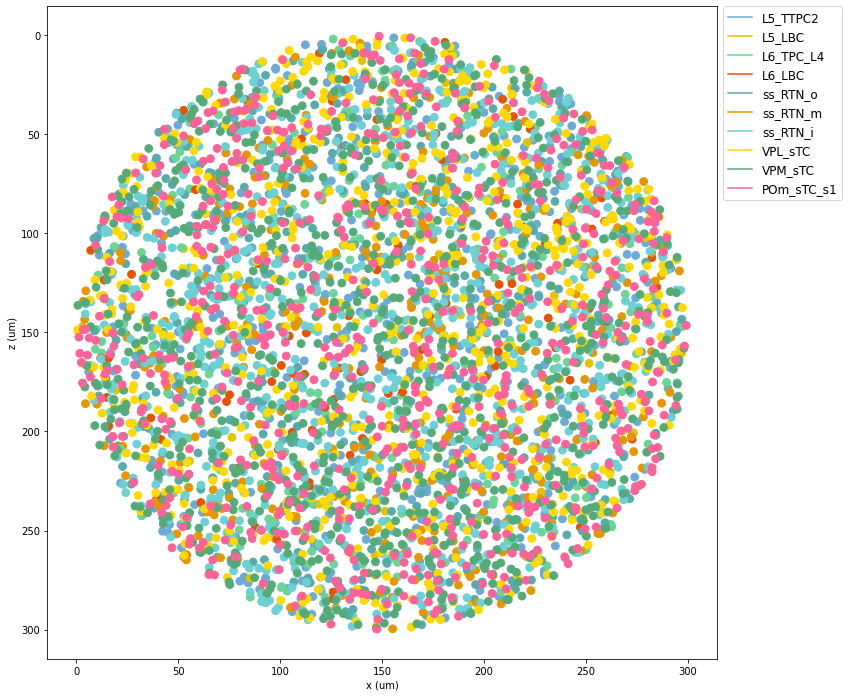

In [55]:
%matplotlib inline
sim.analysis.plot2Dnet(view='xy', showConns=False, popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, saveFig=None, showFig=True, lineWidth=0.1);
sim.analysis.plot2Dnet(view='xz', showConns=False, popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, saveFig=None, showFig=True, lineWidth=0.1);

In [ ]:
VPL_den_radius = 49.1
VPM_den_radius = 73.3
POm_den_radius = 75.4

In [ ]:
sim.analysis.plotConn(includePre=cfg.thalamicpops, includePost = cfg.thalamicpops, feature='convergence', saveFig=True);